In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [6]:
len(iris.target)

150

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

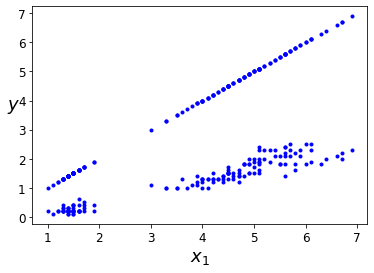

In [9]:
plt.plot(X[:,0],X[:,],"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y $", rotation=0, fontsize=18)
# plt.axis([0, 1, 0, 1])
plt.show()

In [ ]:
# def train_test_split(X,y,test_ratio=0.2,val_ratio= 0.2,seed=45):
#     total_size = len(X)
#     test_size = int(total_size * test_ratio)
#     train_size = total_size - test_size
#     validation_size = int(train_size * val_ratio)
    
#     indeces = np.random.permutation(total_size)
    
#     X_train_ = X[indeces[:train_size]]
#     y_train_ = y[indeces[:train_size]]
    
#     X_train  = X_train_[:-validation_size]
#     y_train = y_train_[:-validation_size]
    
#     X_validation = X_train_[-validation_size:]
#     y_validation = y_train_[-validation_size:]
    
    
#     X_test = X[indeces[train_size:]]
#     y_test = y[indeces[train_size:]]
    
#     return X_train,y_train,X_validation,y_validation,X_test,y_test

In [63]:

def train_test_split(X,y,test_ratio, val_ratio):
    total_size = len(X_with_bias)

    test_size = int(total_size * test_ratio)
    validation_size = int(total_size * val_ratio)
    train_size = total_size - test_size - validation_size

    rnd_indices = np.random.permutation(total_size)

    X_train = X_with_bias[rnd_indices[:train_size]]
    y_train = y[rnd_indices[:train_size]]
    X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
    y_valid = y[rnd_indices[train_size:-test_size]]
    X_test = X_with_bias[rnd_indices[-test_size:]]
    y_test = y[rnd_indices[-test_size:]]
    
    return X_train,y_train,X_valid,y_valid,X_test,y_test


def one_hot_encoder(y):
    n_classes = len(np.unique(y))
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def softmax(z):
    exp_z = np.exp(z)
    sum_exp = np.sum(exp_z,axis = 1,keepdims=True)
#     print("sum",sum_exp.shape)
    return exp_z/sum_exp

def add_bais(X):
    return np.c_[np.ones((len(X),1)),X]

In [ ]:
# indeces = np.random.permutation(150)
# ind1 = np.array(indeces[:75])
# ind2 = np.array(indeces[75:])
# ind1 == ind2

In [198]:
X = iris.data[:,(2,3)]
X = add_bais(X)
y = iris.target
np.random.seed(2042)
X_train,y_train,X_validation,y_validation,X_test,y_test = train_test_split(X,y,test_ratio=0.2,val_ratio=0.2)
y_train_hot = one_hot_encoder(y_train)

X_train.shape,X_validation.shape,X_test.shape

((90, 3), (30, 3), (30, 3))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [218]:
y_validation_hot = one_hot_encoder(y_validation)

In [292]:
def fit(X_train, y_train,epoches,learning_rate=0.1,alpha=0 ,X_valid=None,y_valid = None,early_stopping=False):
    best_loss = np.infty
    epsilon= 1e-7 #tiny value for adding into {a}
    inputs = X_train.shape[1] #features count
    outputs = y_train.shape[1] #classes num
    m = len(X_train)
    theta = np.random.randn(inputs,outputs)
    
    for i in range(epoches):
        
        z = X_train.dot(theta)
        a = softmax(z)

        entropy_loss = -np.mean(np.sum(y_train * np.log(a + epsilon),axis =1))
        l2_loss = 1/2 * np.sum(np.square(theta[1:]))
        loss = entropy_loss + alpha * l2_loss
        error = a - y_train 
        
        gradients = 1/m * (X_train.T.dot(error)) + np.r_[np.zeros([1, outputs]), alpha * theta[1:]]
        theta = theta - learning_rate * gradients
        
        if(i % int(epoches/10) == 0):
            print(i," loss:",loss)
        if early_stopping:
            if  X_valid is None or y_valid is None:
                print("you must pass X,y Validations")
                break
            else:
                z_val = X_valid.dot(theta)
                a_val = softmax(z_val)
                entropy_loss_val = -np.mean(np.sum(y_valid * np.log(a_val + epsilon), axis=1))
                l2_loss_val = 1/2 * np.sum(np.square(theta[1:]))
                val_loss = entropy_loss_val + alpha * l2_loss_val
                
                if val_loss <= best_loss:
                    best_loss = val_loss
                else:
                    print(i - 1, best_loss)
                    print(i, val_loss, "early stopping!")
                    break

    return theta

def predict(X,theta):
    z = X.dot(theta)
    a = softmax(z)
    return np.argmax(a,axis = 1)
    
def score(y_predict,y):
    return np.mean(y_predict == y)


In [288]:
theta = fit(X_train,y_train_hot,5001,0.1)

0  loss: 1.5691830842587495
500  loss: 0.37562542880725214
1000  loss: 0.3002254588543948
1500  loss: 0.25896904034255563
2000  loss: 0.2313200750973268
2500  loss: 0.21112429642172673
3000  loss: 0.19560138554901457
3500  loss: 0.18324246487373172
4000  loss: 0.17313911811649224
4500  loss: 0.16470596834755985
5000  loss: 0.1575468162104543


In [289]:
predict(X_valid,y_valid,theta)
predict(X_test,y_test,theta)

[0 1 0 2 0 1 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 1 1 0 1 1 2 2 1 1]
[0 1 0 2 0 1 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 1 1 0 1 1 2 2 1 1]
[2 2 2 1 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 0 2 1 0 2 0 0 1 0 2 1]
[1 2 2 1 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 0 2 1 0 2 0 0 1 0 2 1]


0.9666666666666667

In [286]:
theta1 = fit(X_train,y_train_hot,5001,0.1,alpha= 0.1)

0  loss: 7.179047798666225
500  loss: 0.5265244930887678
1000  loss: 0.5015819386364091
1500  loss: 0.4939375014775161
2000  loss: 0.4909932031395442
2500  loss: 0.4897702883258264
3000  loss: 0.4892427262303596
3500  loss: 0.489010094448172
4000  loss: 0.4889061214688285
4500  loss: 0.48885925072271175
5000  loss: 0.4888380031224939


In [287]:
predict(test(X_valid,y_valid,theta1))
predict(test(X_test,y_test,theta1))

[0 1 0 2 0 1 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 1 1 0 1 1 2 2 1 1]
[0 1 0 2 0 1 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 1 1 0 1 1 2 2 1 1]
[2 2 2 1 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 0 2 1 0 2 0 0 2 0 2 1]
[1 2 2 1 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 0 2 1 0 2 0 0 1 0 2 1]


0.9333333333333333

In [290]:
theta2 = fit(X_train,y_train_hot,5001,0.1,alpha= 0.1,early_stopping=True,X_valid=X_validation,y_valid=y_validation_hot)
predict(X_valid,y_valid,theta2)

0  loss: 1.655222794223521
500  loss: 0.5267280187381854
1000  loss: 0.5020009986961208
1500  loss: 0.4941012446648669
2000  loss: 0.4910598998282363
2500  loss: 0.4897986876162438
2643 0.5325458634090332
2644 0.5325458635152238 early stopping!
[0 1 0 2 0 1 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 1 1 0 1 1 2 2 1 1]
[0 1 0 2 0 1 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 1 1 0 1 1 2 2 1 1]


1.0

In [291]:
# test(X_valid,y_valid,theta1)
predict(X_test,y_test,theta1)

[2 2 2 1 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 0 2 1 0 2 0 0 2 0 2 1]
[1 2 2 1 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 0 2 1 0 2 0 0 1 0 2 1]


0.9333333333333333

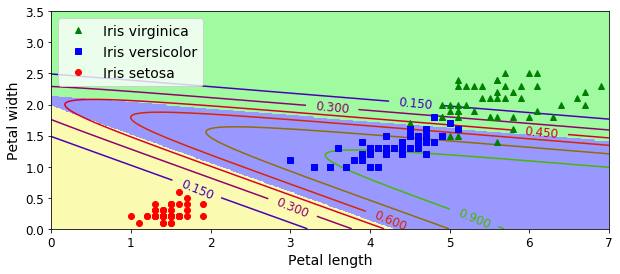

In [311]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(),x1.ravel()]
X_new_bais = add_bais(X_new)
z = X_new_bais.dot(theta)
a = softmax(z)
y_predict = predict(X_new_bais,theta)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 1], X[y==2, 2], "g^", label="Iris virginica")
plt.plot(X[y==1, 1], X[y==1, 2], "bs", label="Iris versicolor")
plt.plot(X[y==0, 1], X[y==0, 2], "ro", label="Iris setosa")

zz1 = a[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [252]:
np.linspace(0, 4, 4).reshape(-1, 1),

(array([[0.        ],
        [1.33333333],
        [2.66666667],
        [4.        ]]),)

In [261]:
l2 = np.linspace(100, 108, 8).reshape(-1, 1)
l2.shape

(8, 1)

In [6]:
import numpy as np

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 4).reshape(-1, 1),
        np.linspace(0, 3.5, 8).reshape(-1, 1),
    )

array([[0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ],
       [0.        , 2.66666667, 5.33333333, 8.        ]])

In [23]:
import re
text = "14th_century;Time;Isaac_Newton;Rainbow"+"14th_century;Renaissance;Science;Physics;Isaac_Newton;Color;Rainbow"
pattern = r'14th'
re.match(pattern,text,flags=1)

<re.Match object; span=(0, 4), match='14th'>